In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
data_criminal = pd.read_csv(r'C:\Users\Adi\Documents\codingan\data\london_crime_by_lsoa.csv')

In [3]:
data_criminal.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
data_criminal.isnull().sum().sum()

0

In [5]:
data_criminal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [18]:
data_criminal['year'].head()

0    2016
1    2016
2    2015
3    2016
4    2008
Name: year, dtype: int64

### Area Plot

In [11]:
data_criminal.set_index('year', inplace=True)

data_criminal.plot.area()
plt.title('')
plt.xlabel('Tahun')
plt.ylabel('Produksi')
plt.legend(['Produksi_A', 'Produksi_B'])
plt.show()

OverflowError: In draw_markers: Exceeded cell block limit

<Figure size 640x480 with 1 Axes>

### Histogram

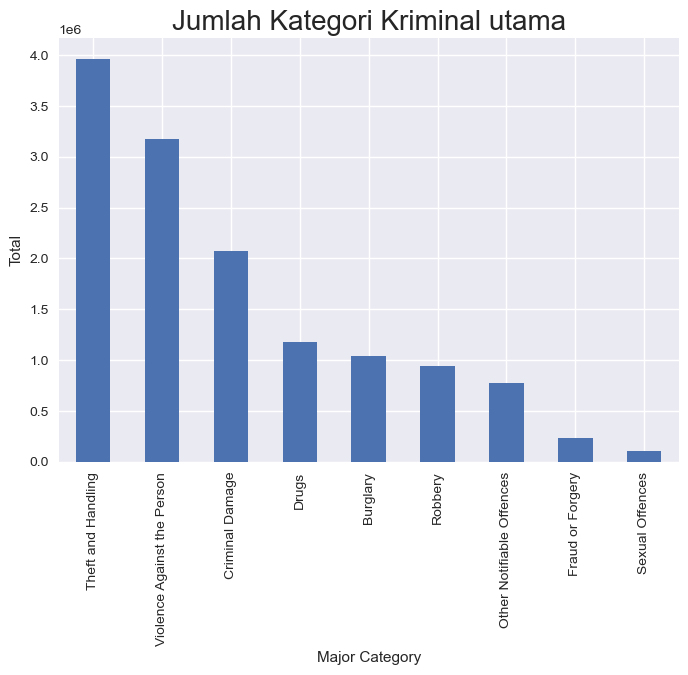

In [6]:
data_criminal.major_category.value_counts().plot.bar()
plt.title("Jumlah Kategori Kriminal utama", size=20)
plt.xlabel("Major Category")
plt.ylabel("Total")
plt.show()

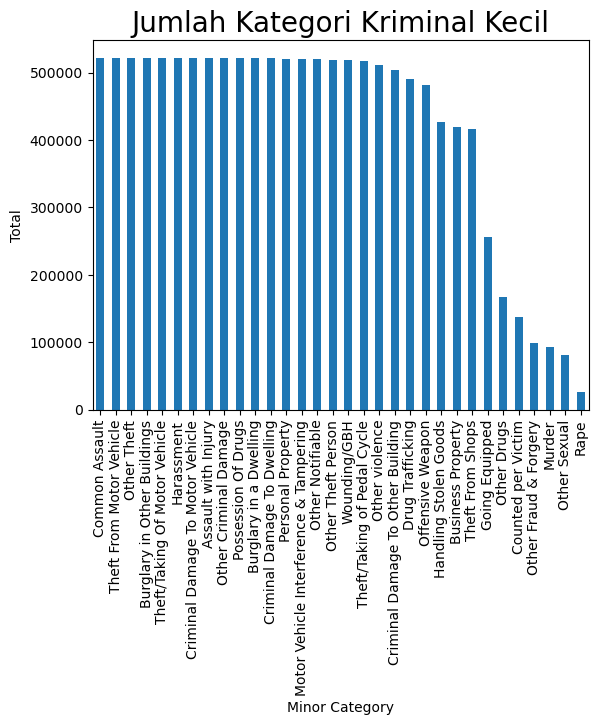

In [17]:
data_criminal.minor_category.value_counts().plot.bar()
plt.title("Jumlah Kategori Kriminal Kecil", size=20)
plt.xlabel("Minor Category")
plt.ylabel("Total")
plt.show()

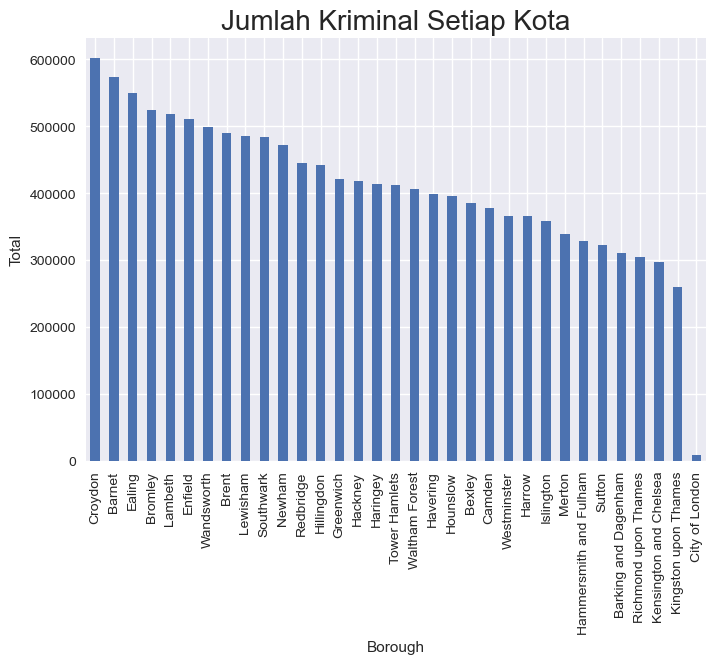

In [7]:
data_criminal.borough.value_counts().plot.bar()
plt.title("Jumlah Kriminal Setiap Kota", size=20)
plt.xlabel("Borough")
plt.ylabel("Total")
plt.show()

### Bar chart

In [5]:
x = data_criminal['value']
y = data_criminal['month']

plt.bar(x, y, color=['green', 'red'])
plt.title("data criminal per bulan")
plt.xlabel('value')
plt.ylabel('month')
plt.show()

KeyboardInterrupt: 

### Pie Chart

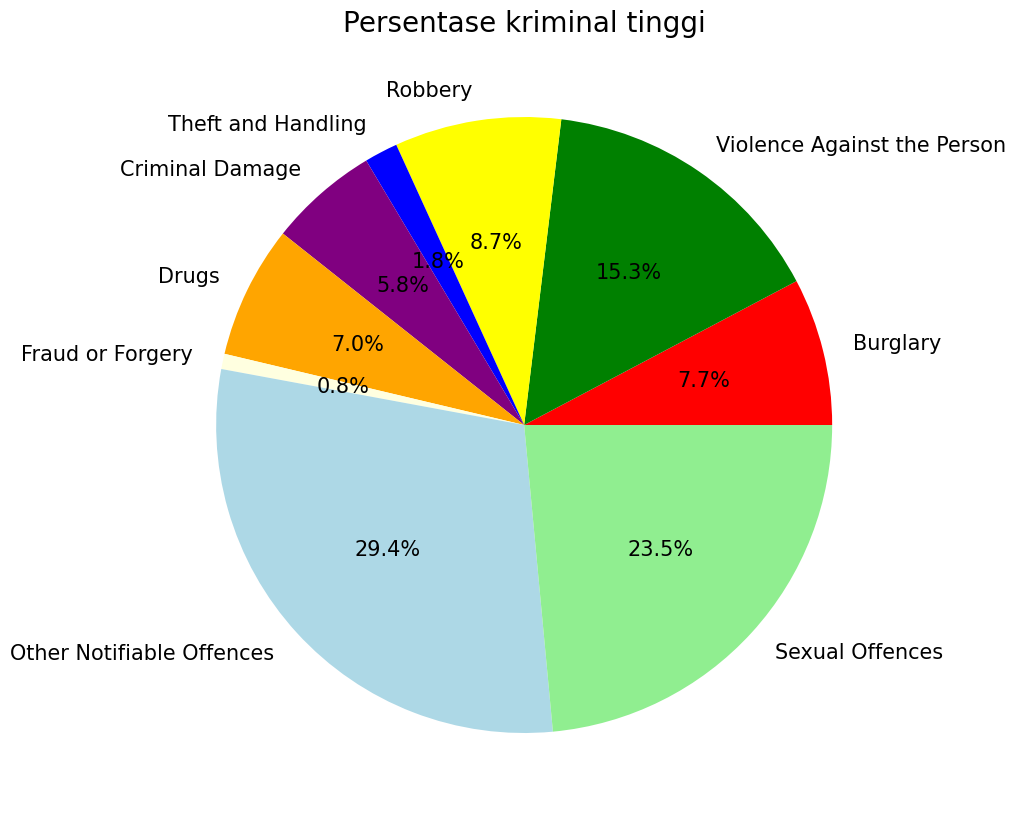

In [5]:
lables = data_criminal['major_category'].unique()
sizes = data_criminal.groupby(['major_category']).size()
colors=['red','green','yellow','blue', 'purple','orange','lightyellow','lightblue','lightgreen']

plt.figure(figsize = (20,10))
plt.title('Persentase kriminal tinggi', size=20)
plt.pie(sizes, labels = lables, colors = colors, autopct = '%1.1f%%', textprops = {'fontsize': 15,'color':'black'})
plt.show()

### Box Plot

In [ ]:
plt.style.use('seaborn')
plt.boxplot(data_criminal['borough'])
plt.title('Data criminal', size=20)
plt.grid(True)
plt.show()

### Scatter plot

C:\Users\Adi\AppData\Local\Temp\ipykernel_28440\2314813624.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_month = data_criminal.groupby(['year']).sum()
C:\Users\Adi\AppData\Local\Temp\ipykernel_28440\2314813624.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


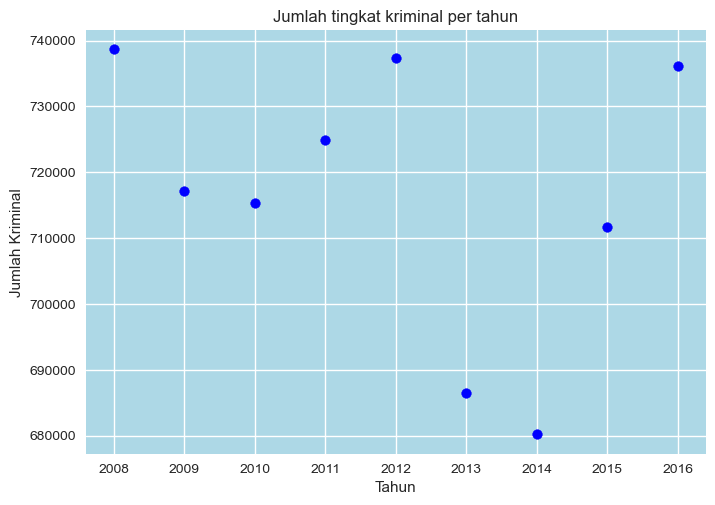

In [3]:
sum_month = data_criminal.groupby(['year']).sum()
value = sum_month['value'].to_numpy()
years = sum_month.index

plt.style.use('seaborn')
ax = plt.axes()
ax.set_facecolor("lightblue")
plt.scatter(years, value, color='blue')
plt.title('Jumlah tingkat kriminal per tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kriminal')
plt.show()

### Word cloud

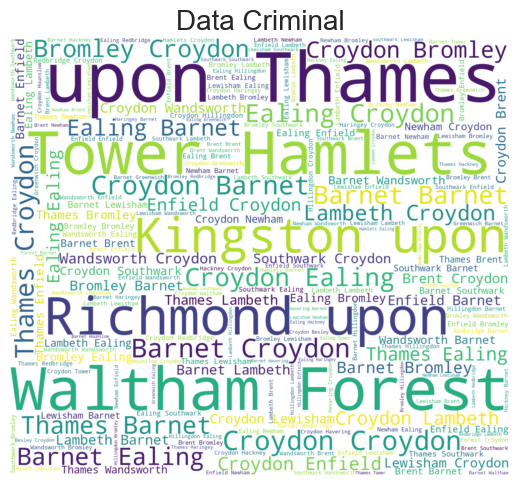

In [ ]:
teks_data = ' '.join(data_criminal['borough'])

wordcloud = WordCloud(background_color='white', mode="RGB", width=1600, height=1400)
wordcloud.generate(teks_data)
plt.figure(figsize=(5,10))
plt.title('Data Criminal', size=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Folium map

In [11]:
london=r"C:\Users\Adi\Documents\codingan\data\london_boroughs.geojson"
london_location = [51.507222, -0.1275]
london_map = folium.Map(location=london_location, zoom_start=10)
folium.Choropleth(geo_data=london, 
                  data=data_criminal, 
                  columns=['borough', 'value'], 
                  key_on='feature.properties.name',
                  fill_color='YlOrRd',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name="Tingkat Kriminal Setiap Wilayah").add_to(london_map)
london_map

### Lineplot

In [ ]:
x = data_criminal['value'],data_criminal['year']
y = data_criminal['month'],data_criminal['year']

plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('value')
plt.ylabel('month')
plt.show()

C:\Users\Adi\AppData\Local\Temp\ipykernel_15712\179038004.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


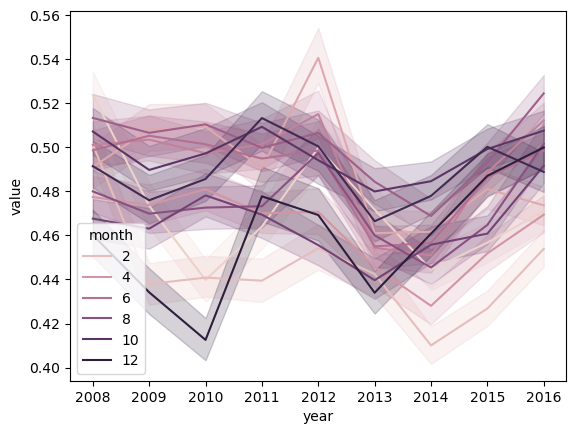

In [ ]:
sns.lineplot(data=data_criminal, x="year", y="value", hue="month")
plt.show()